In [232]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as pl
import itertools
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge,Lasso


In [51]:
df=pd.read_csv('concrete.csv')
df.columns=['cement','furnace_slag','fly_ash','water','super_plas','coarse_agg','fine_agg','age','strength']

In [52]:
df.head()

,cement,furnace_slag,fly_ash,water,super_plas,coarse_agg,fine_agg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   furnace_slag  1030 non-null   float64
 2   fly_ash       1030 non-null   float64
 3   water         1030 non-null   float64
 4   super_plas    1030 non-null   float64
 5   coarse_agg    1030 non-null   float64
 6   fine_agg      1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [54]:
df.isnull().sum()

cement          0
furnace_slag    0
fly_ash         0
water           0
super_plas      0
coarse_agg      0
fine_agg        0
age             0
strength        0
dtype: int64

In [55]:
data1=df.copy()

In [56]:
data1=data1.sort_values('coarse_agg',ascending=True).reset_index(drop=True)


In [57]:
df.head()

,cement,furnace_slag,fly_ash,water,super_plas,coarse_agg,fine_agg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


<IPython.core.display.Javascript object>

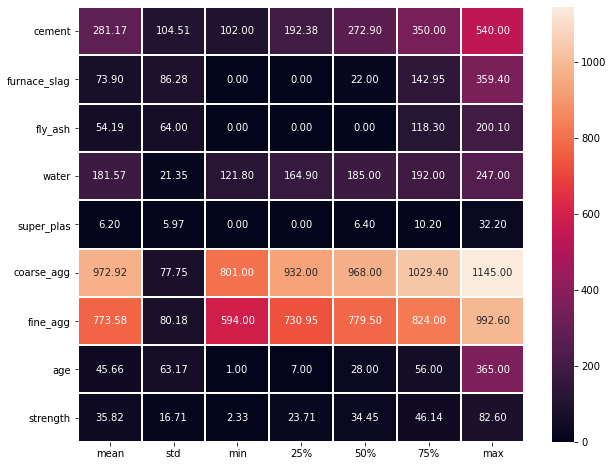

In [72]:
pl.figure(figsize=(10,8))
sns.heatmap(df.describe().T.iloc[:,1:],annot=True,linewidth=1,fmt='.2f')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

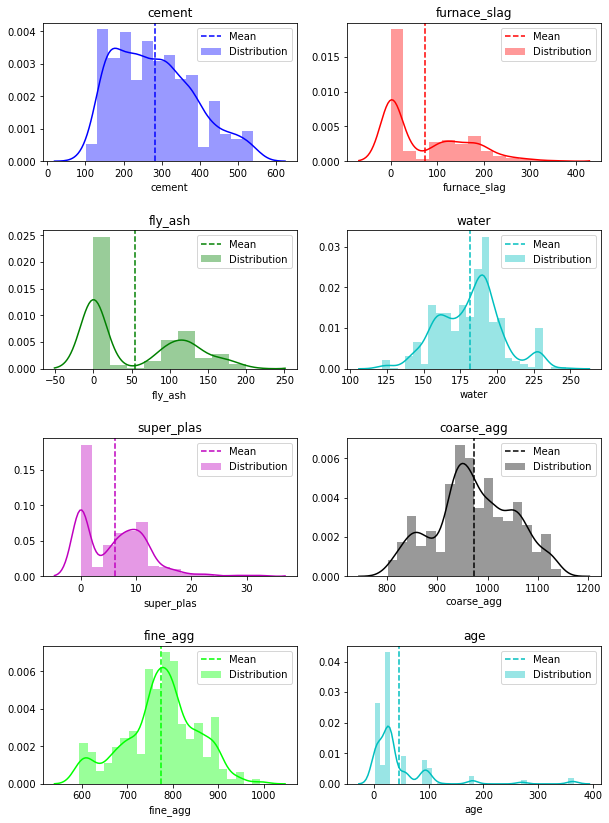

In [111]:
colors=["b","r","g","c","m","k","lime","c"]
pl.figure(figsize=(10,14))
for k,i,j in itertools.zip_longest(range(len(colors)),df.columns[:-1],colors):
    pl.subplot(4,2,k+1)
    sns.distplot(df[i],color=j,label='Distribution')
    pl.axvline(df[i].mean(),color=j,linestyle='dashed',label='Mean')
    pl.subplots_adjust(hspace=.5)
    pl.legend()
    pl.title(i)
pl.show()

<IPython.core.display.Javascript object>

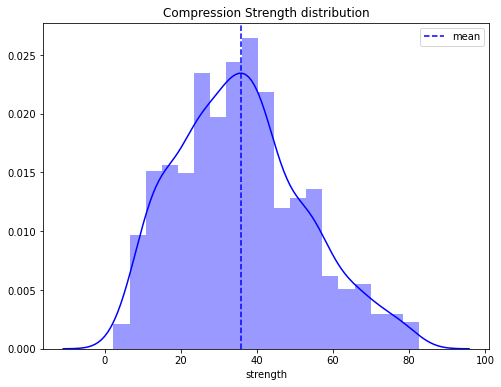

In [122]:
pl.figure(figsize=(8,6))
sns.distplot(df['strength'],color='b')
pl.axvline(df['strength'].mean(),linestyle='dashed',color='b',label='mean')
pl.legend()
pl.title('Compression Strength distribution')
pl.show()

<IPython.core.display.Javascript object>

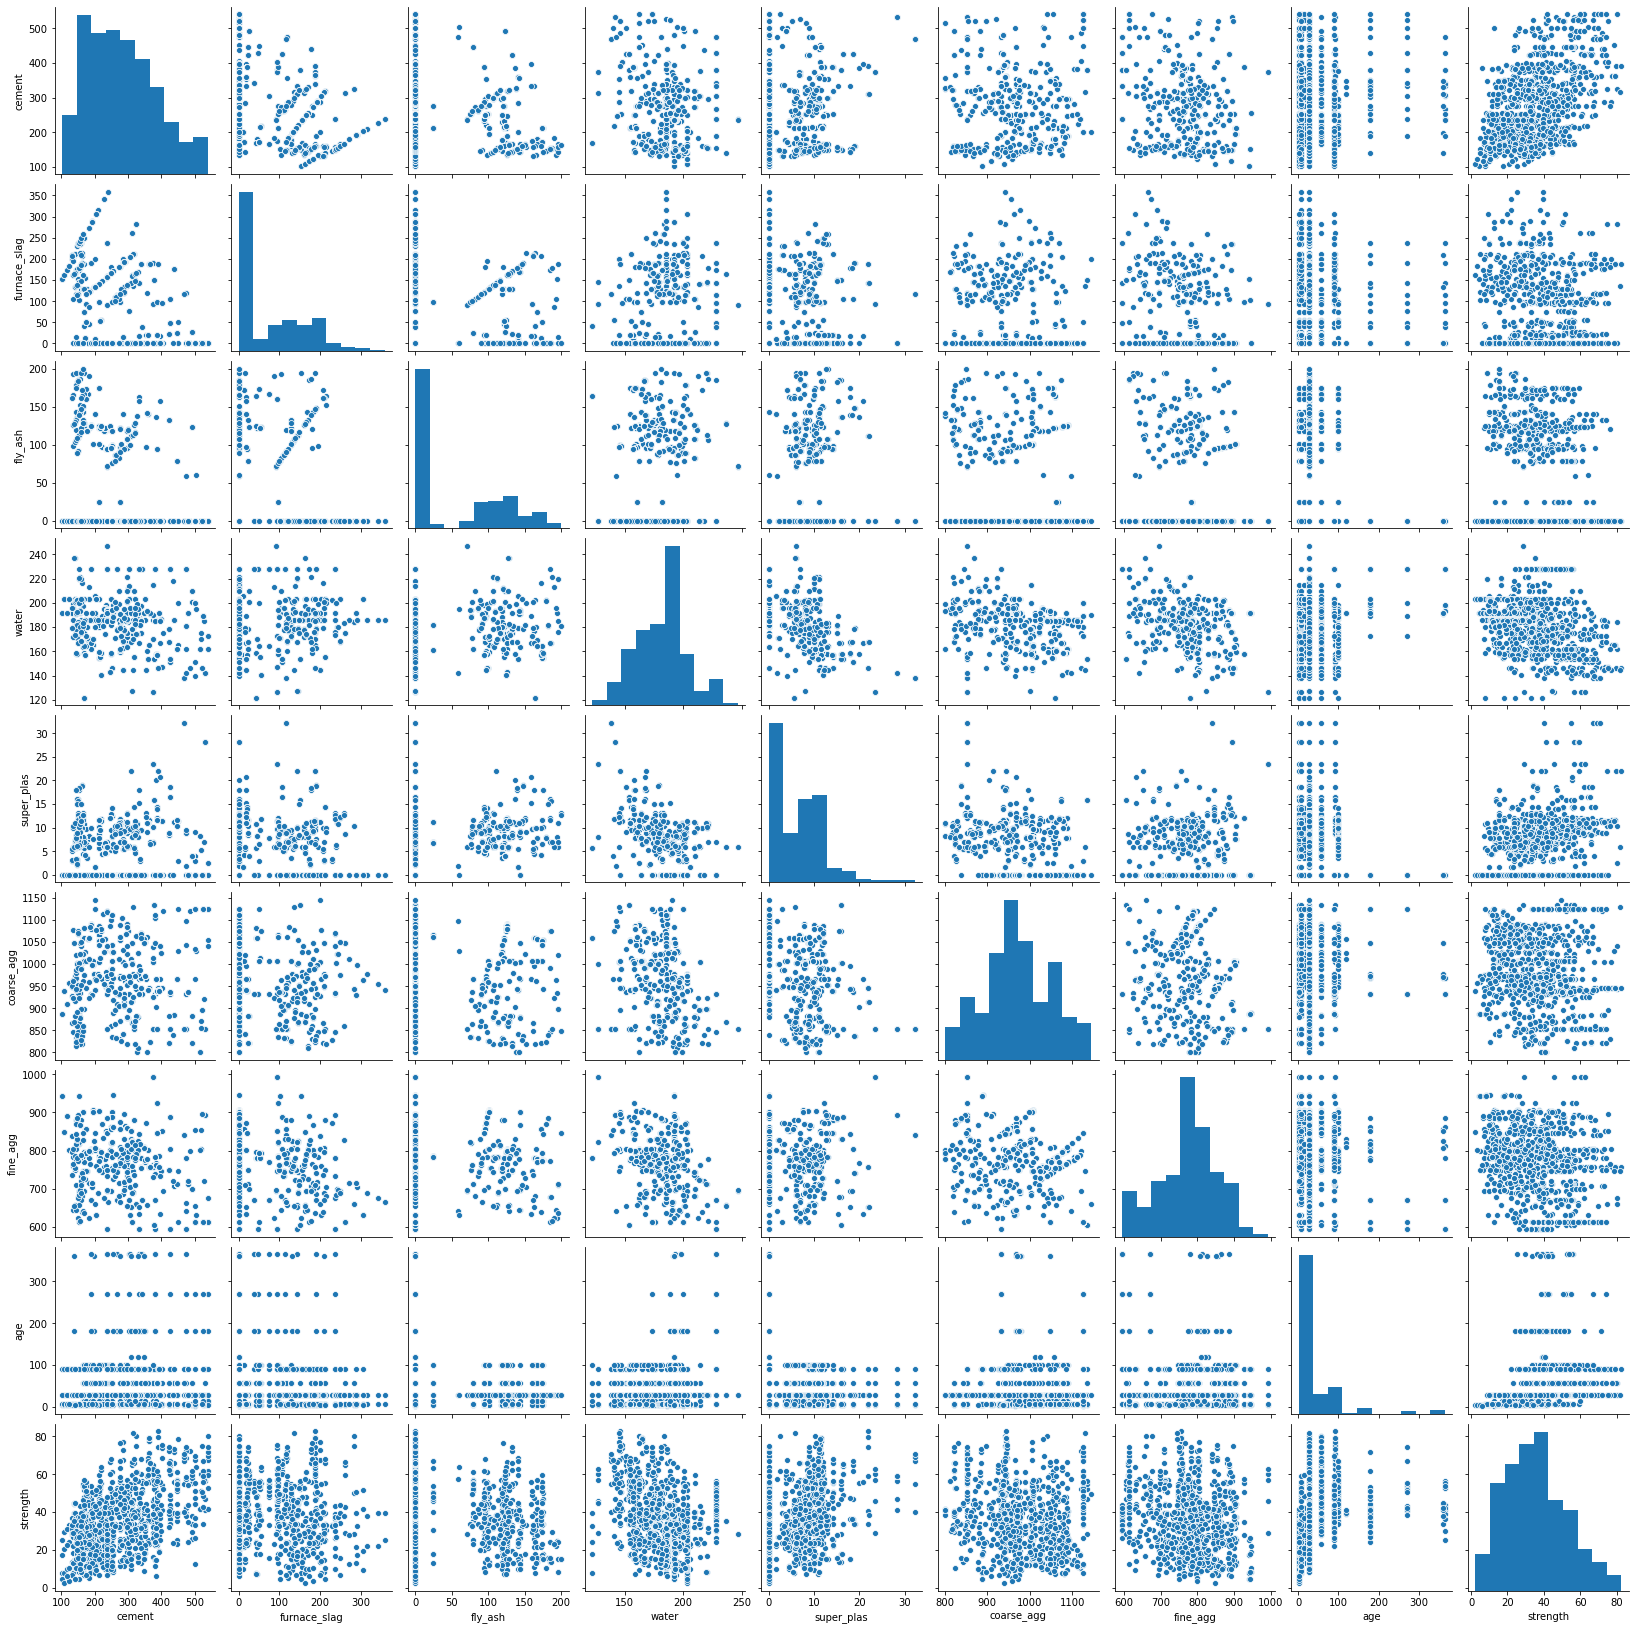

In [123]:
sns.pairplot(df)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

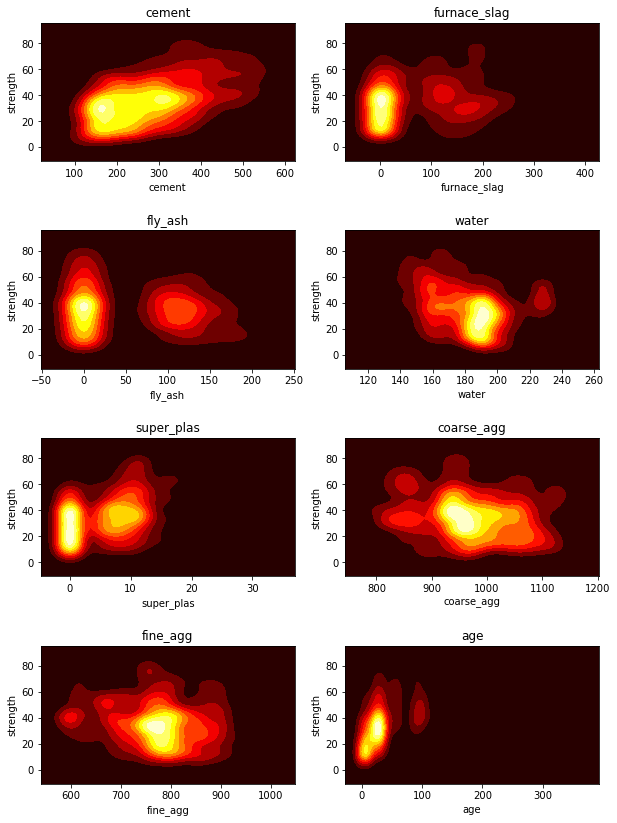

In [130]:
pl.figure(figsize=(10,14))
for k,i, in itertools.zip_longest(range(len(df.columns[:-1])),df.columns[:-1]):
    pl.subplot(4,2,k+1)
    sns.kdeplot(df[i],df['strength'],cmap='hot',shade=True)
    pl.subplots_adjust(hspace=.5)
    pl.title(i)
pl.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Correlation between variables')

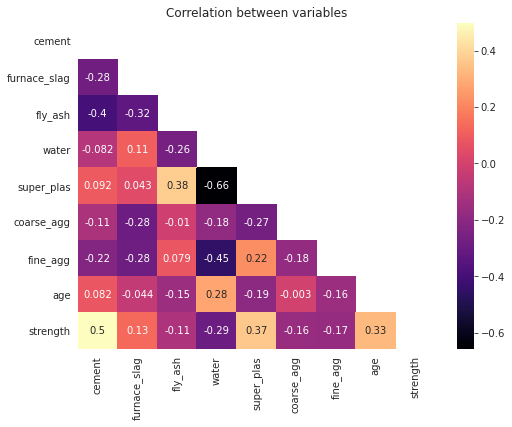

In [137]:
cor=df.corr()
mask=np.zeros_like(cor)
mask[np.triu_indices_from(mask)]=True
pl.figure(figsize=(8,6))
with sns.axes_style('white'):
    sns.heatmap(cor,mask=mask,
               annot=True,
               cmap='magma')
pl.title('Correlation between variables')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

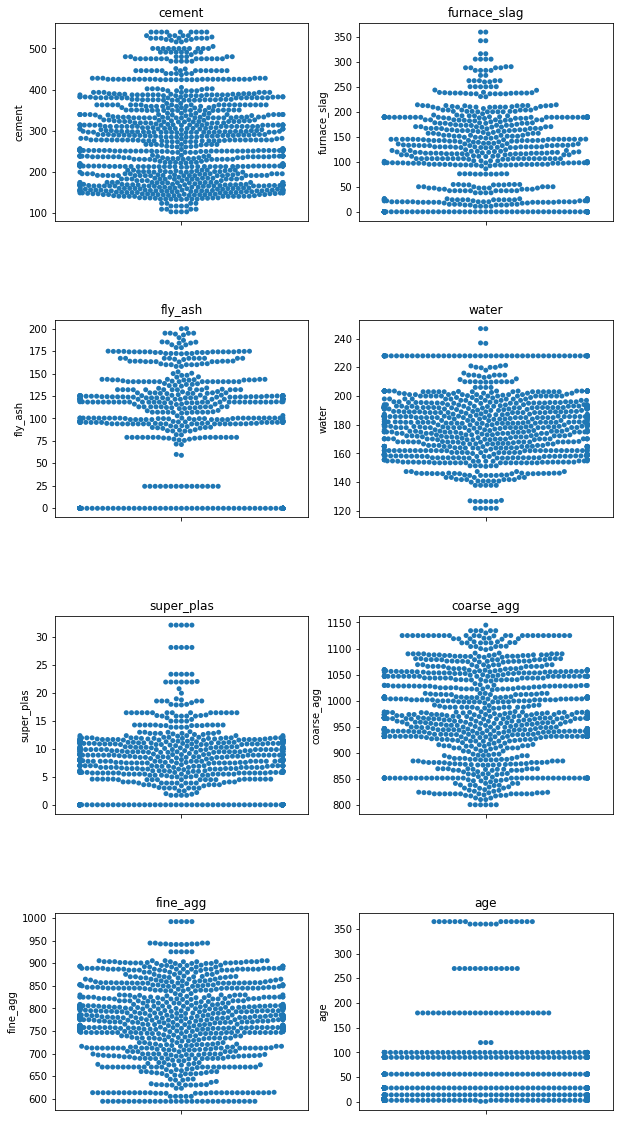

In [140]:
pl.figure(figsize=(10,20))
for k,i, in itertools.zip_longest(range(len(df.columns[:-1])),df.columns[:-1]):
    pl.subplot(4,2,k+1)
    sns.swarmplot(y=df[i])
    pl.subplots_adjust(hspace=.5)
    pl.title(i)
pl.show()

In [144]:
def label(data):
    if data["age"] <= 30:
        return "1 month"
    if data["age"] > 30 and data["age"] <= 60 :
        return "2 months"
    if data["age"] > 60 and data["age"] <= 90 :
        return "3 months"
    if data["age"] > 90 and data["age"] <= 120 :
        return "4 months"
    if data["age"] > 120 and data["age"] <= 150 :
        return "5 months"
    if data["age"] > 150 and data["age"] <= 180 :
        return "6 months"
    if data["age"] > 180 and data["age"] <= 210 :
        return "7 months"
    if data["age"] > 210 and data["age"] <= 240 :
        return "8 months"
    if data["age"] > 240 and data["age"] <= 270 :
        return "9 months"
    if data["age"] > 270 and data["age"] <= 300 :
        return "10 months"
    if data["age"] > 300 and data["age"] <= 330 :
        return "11 months"
    if data["age"] > 330 :
        return "12 months"
df["age_months"] = df.apply(lambda data:label(data) , axis=1)

In [145]:
df.head()

,cement,furnace_slag,fly_ash,water,super_plas,coarse_agg,fine_agg,age,strength,age_months
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,1 month
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,1 month
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,9 months
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,12 months
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,12 months


<IPython.core.display.Javascript object>

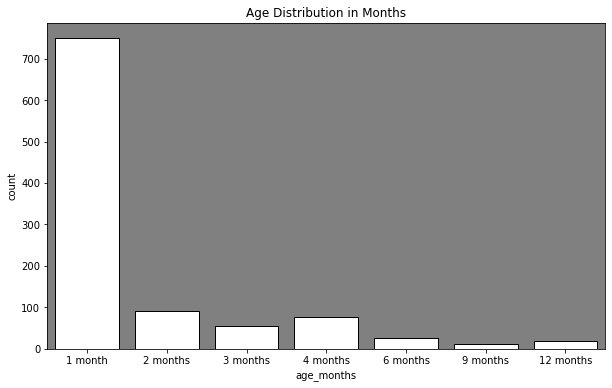

In [155]:
pl.figure(figsize=(10,6))
order = ['1 month','2 months', '3 months','4 months','6 months','9 months', '12 months']
ax=sns.countplot(df['age_months'],order=order,color='w',
                edgecolor='k',
                linewidth=1)
ax.set_facecolor('grey')
pl.title('Age Distribution in Months')
pl.show()

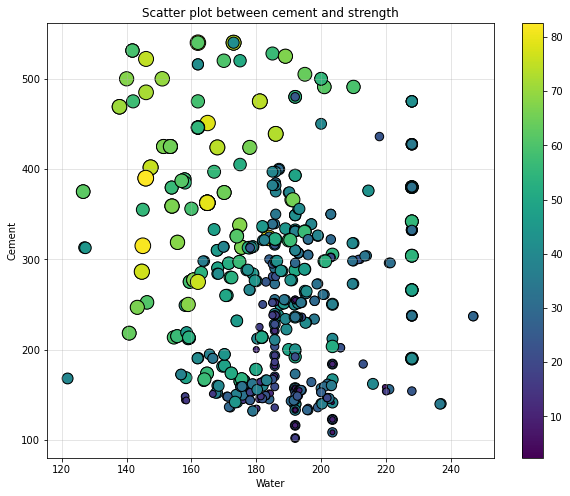

In [184]:
pl.figure(figsize=(10,8))
pl.scatter(df['water'],df['cement'],c=df['strength'],s=df['strength']*3,
          linewidth=1,edgecolor='k',cmap='viridis'
          )
pl.colorbar()
pl.xlabel('Water')
pl.ylabel('Cement')
pl.grid(alpha=.4)
pl.title('Scatter plot between cement and strength')
pl.show()

In [189]:
train,test=train_test_split(df,test_size=.3,random_state=0)
X_train=train.iloc[:,:-2]
y_train=train['strength']
X_test=test.iloc[:,:-2]
y_test=test['strength']

In [201]:
from sklearn.model_selection import cross_val_score

In [233]:
def modelPlot(algo,model,feature):
    print('Algorithm: ',algo)
    print('**********************************************')
    model.fit(X_train,y_train)
    predict=model.predict(X_test)
    print("Root Mean Squared error",np.sqrt(mean_squared_error(y_test,predict)))
    print('**********************************************')
    prediction=pd.DataFrame(predict)
    cross_val=cross_val_score(model,X_train,y_train,cv=20,scoring='neg_mean_squared_error')
    cross_val=cross_val.ravel()
    print("Cross Validation Score")
    print('**********************************************')
    print('cv_mean: ',cross_val.mean())
    print ("cv-std  :",cross_val.std())
    print ("cv-max  :",cross_val.max())
    print ("cv-min  :",cross_val.min())
    test_y=y_test.reset_index()['strength']
    pl.figure(figsize=(10,15))
    pl.subplot(211)
    pl.title('Original vs Predicted plot')
    pl.plot(test_y,label='Original')
    pl.plot(predict,label='Predicted')
    pl.legend()
    
    pl.subplot(212)
    if feature=='coef':
        
        coef=pd.DataFrame(model.coef_.ravel(),columns=['Score'])
        coef['feat']=X_train.columns
        sns.barplot(y='Score',x='feat',data=coef,linewidth=1,
                   edgecolor='k')
        pl.title('Feature Importances')
        pl.xticks(rotation=60)
        
        
        
    if feature=='feat':
        coef=pd.DataFrame(model.feature_importances_,columns=['Score'])
        coef['feat']=X_train.columns
        sns.barplot(y='Score',x='feat',data=coef,linewidth=1,
                   edgecolor='k')
        pl.title('Feature Importances')
        pl.xticks(rotation=60)
        
    
    


Algorithm:  Linear Regression
**********************************************


<IPython.core.display.Javascript object>

Root Mean Squared error 9.675677546609508
**********************************************
Cross Validation Score
**********************************************
cv_mean:  -116.60759951589588
cv-std  : 25.231084832265886
cv-max  : -72.53538076700887
cv-min  : -152.48889327439832


<IPython.core.display.Javascript object>

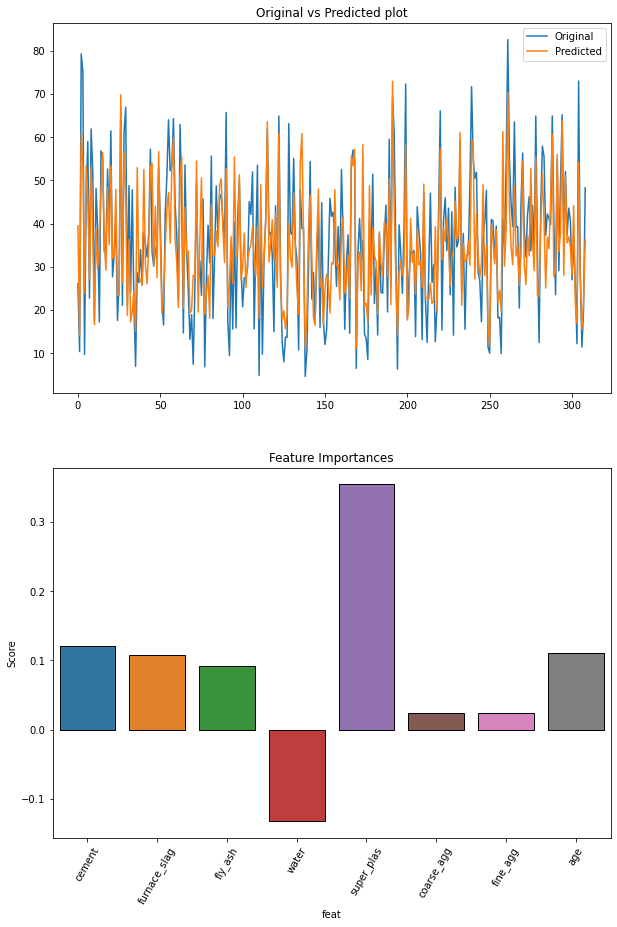

In [234]:
modelPlot('Linear Regression',LinearRegression(),'coef')

Algorithm:  Lasso Regression
**********************************************


<IPython.core.display.Javascript object>

Root Mean Squared error 9.656770498453433
**********************************************
Cross Validation Score
**********************************************
cv_mean:  -116.65517813287929
cv-std  : 25.010422501101008
cv-max  : -73.39688643554636
cv-min  : -151.45563666097343


<IPython.core.display.Javascript object>

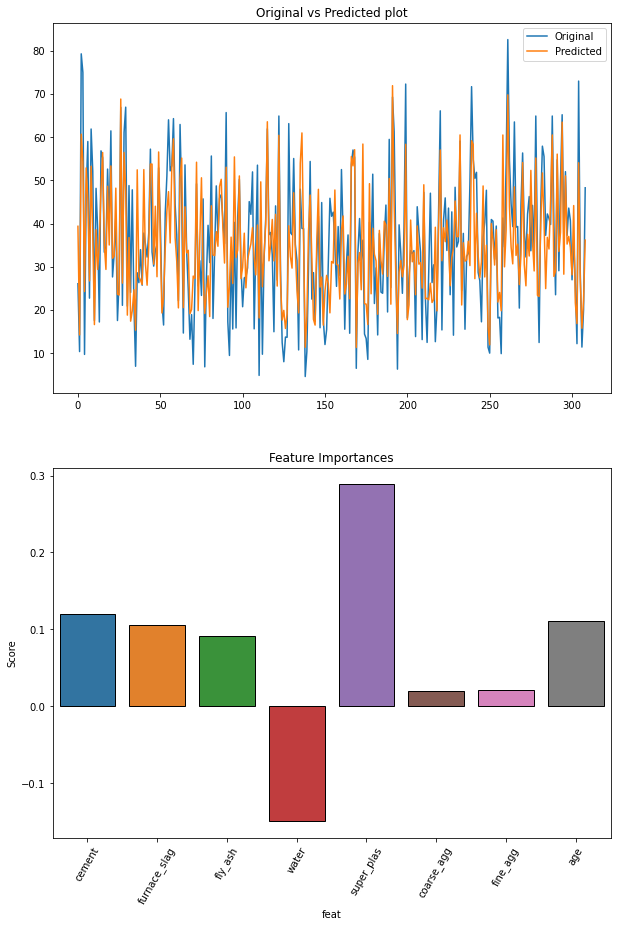

In [235]:
modelPlot('Lasso Regression',Lasso(),'coef')

Algorithm:  Ridge Regression
**********************************************


<IPython.core.display.Javascript object>

Root Mean Squared error 9.675667674099264
**********************************************
Cross Validation Score
**********************************************
cv_mean:  -116.60749970413822
cv-std  : 25.230886756652453
cv-max  : -72.53564382755268
cv-min  : -152.4873007335608


<IPython.core.display.Javascript object>

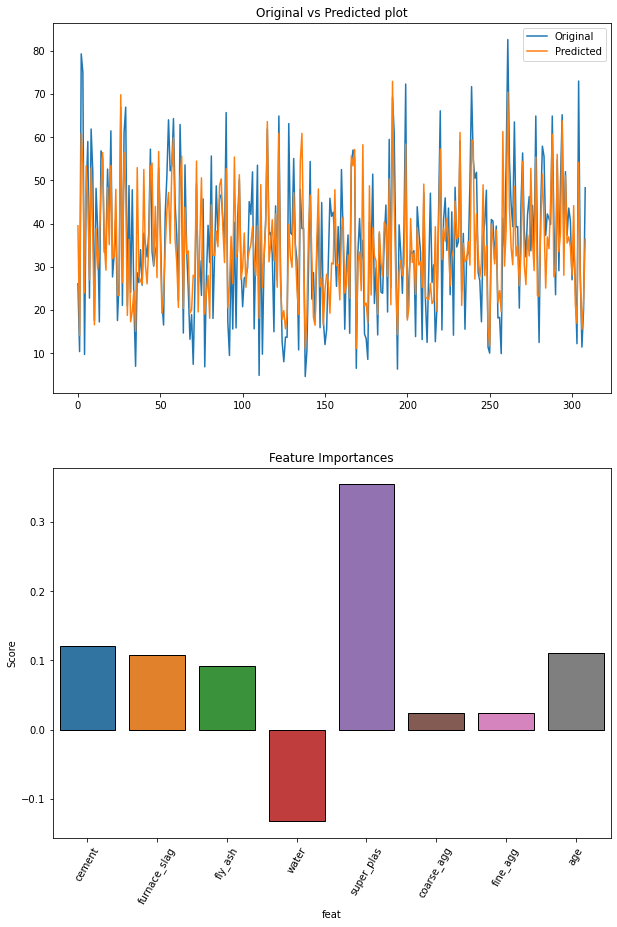

In [236]:
modelPlot('Ridge Regression',Ridge(),'coef')

Algorithm:  AdaBoost Regressor
**********************************************


<IPython.core.display.Javascript object>

Root Mean Squared error 7.543461217141648
**********************************************
Cross Validation Score
**********************************************
cv_mean:  -61.77308253930255
cv-std  : 17.0776414667803
cv-max  : -36.82523316494375
cv-min  : -108.4766742792313


<IPython.core.display.Javascript object>

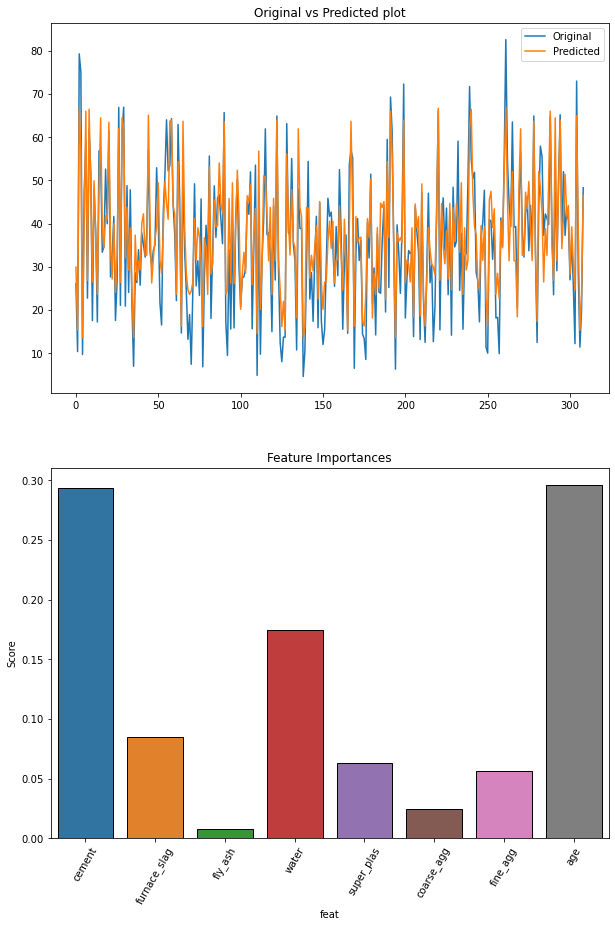

In [237]:
from sklearn.ensemble import AdaBoostRegressor
modelPlot('AdaBoost Regressor',AdaBoostRegressor(),'feat')

Algorithm:  Extra Tree Regressor
**********************************************


<IPython.core.display.Javascript object>

Root Mean Squared error 4.878172623787276
**********************************************
Cross Validation Score
**********************************************
cv_mean:  -24.541760952348902
cv-std  : 12.50604811505236
cv-max  : -10.222861542499992
cv-min  : -65.78663023173596


<IPython.core.display.Javascript object>

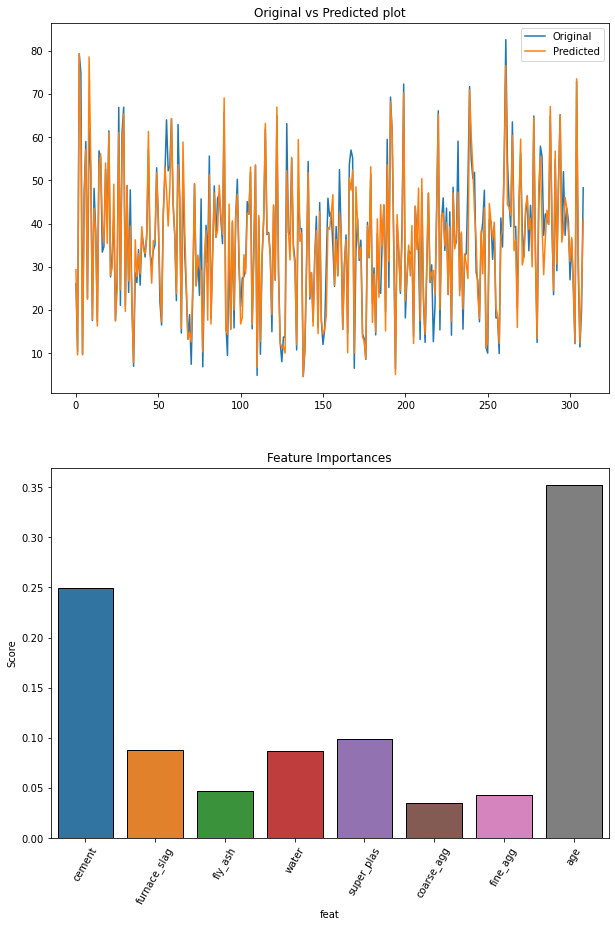

In [238]:
from sklearn.ensemble import ExtraTreesRegressor
modelPlot('Extra Tree Regressor',ExtraTreesRegressor(),'feat')

Algorithm:  Decision Tree
**********************************************


<IPython.core.display.Javascript object>

Root Mean Squared error 7.447664964968599
**********************************************
Cross Validation Score
**********************************************
cv_mean:  -51.694087621058564
cv-std  : 32.88994702151274
cv-max  : -18.24256111111111
cv-min  : -140.6768055555556


<IPython.core.display.Javascript object>

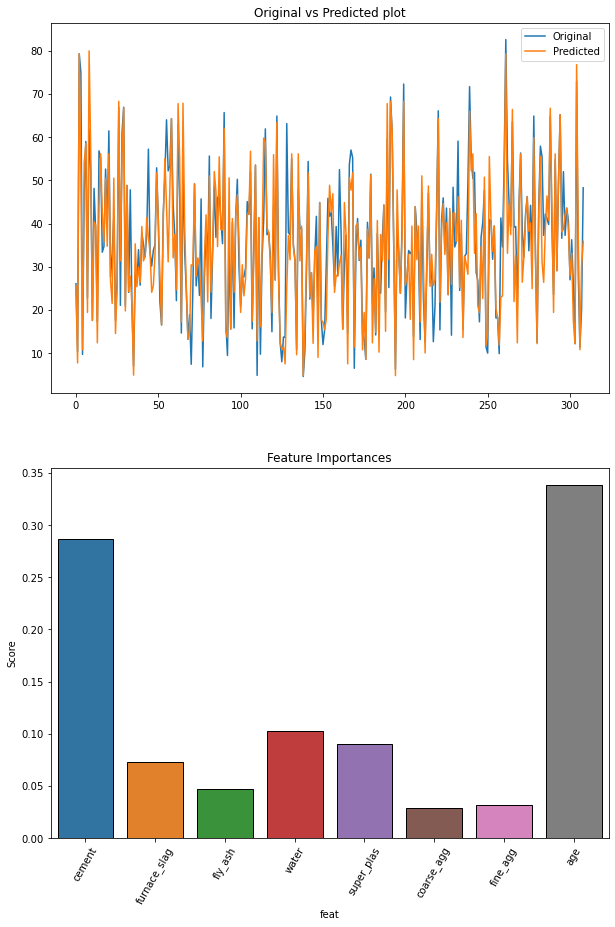

In [239]:
from sklearn.tree import DecisionTreeRegressor
modelPlot('Decision Tree',DecisionTreeRegressor(),'feat')

Algorithm:  Random Forest Regressor
**********************************************


<IPython.core.display.Javascript object>

Root Mean Squared error 5.2237363095007705
**********************************************
Cross Validation Score
**********************************************
cv_mean:  -27.502606519136815
cv-std  : 13.821044434342394
cv-max  : -11.133610866666656
cv-min  : -70.88706742462328


<IPython.core.display.Javascript object>

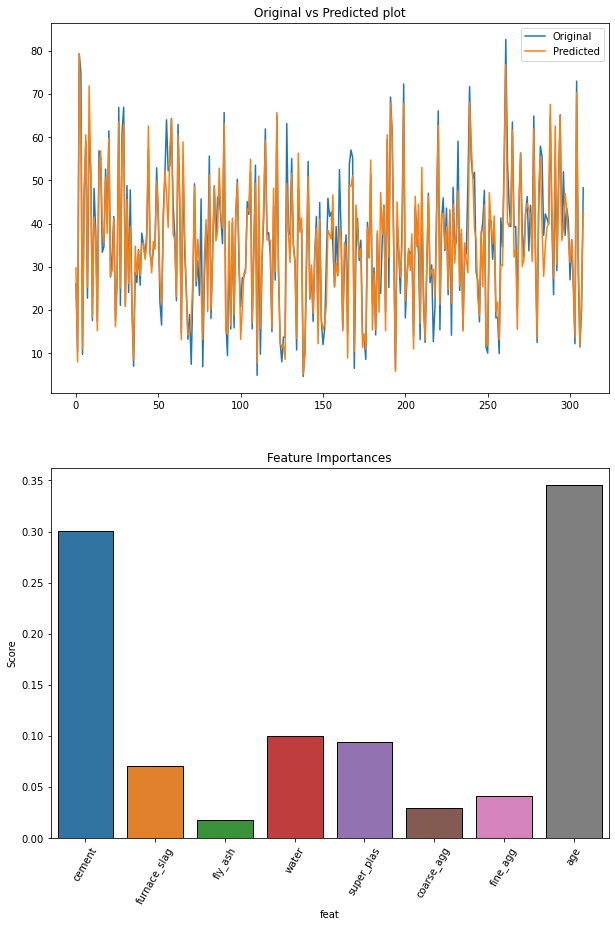

In [240]:
from sklearn.ensemble import RandomForestRegressor
modelPlot('Random Forest Regressor',RandomForestRegressor(),'feat')

Algorithm:  Gradient Boosting Regressor
**********************************************


<IPython.core.display.Javascript object>

Root Mean Squared error 5.113572280697851
**********************************************
Cross Validation Score
**********************************************
cv_mean:  -29.980736474813007
cv-std  : 11.432468257871687
cv-max  : -18.483262142548202
cv-min  : -62.44839772820025


<IPython.core.display.Javascript object>

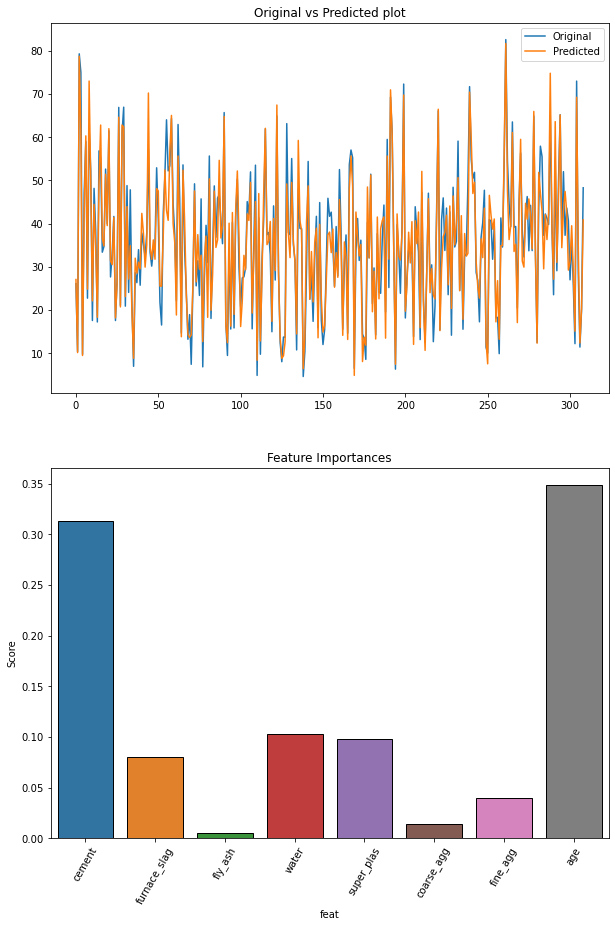

In [241]:
from sklearn.ensemble import GradientBoostingRegressor
modelPlot('Gradient Boosting Regressor',GradientBoostingRegressor(),'feat')

Algorithm:  XGBoost Regressor
**********************************************


<IPython.core.display.Javascript object>

Root Mean Squared error 4.9169812751590865
**********************************************
Cross Validation Score
**********************************************
cv_mean:  -23.59475134975316
cv-std  : 12.026057878675482
cv-max  : -8.779971475060755
cv-min  : -49.80851228243228


<IPython.core.display.Javascript object>

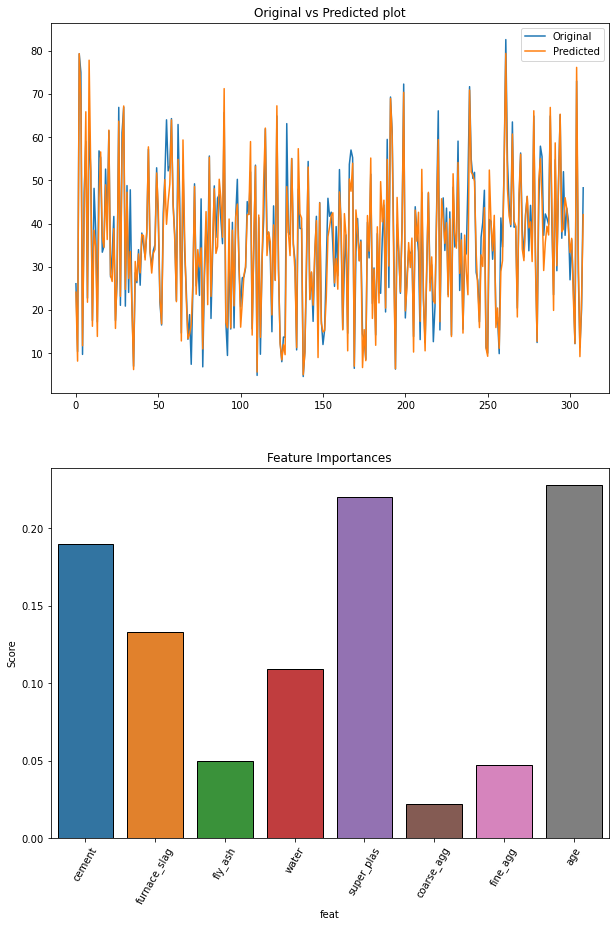

In [242]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
modelPlot('XGBoost Regressor',XGBRegressor(),'feat')